<a href="https://colab.research.google.com/github/AndrehAguiar/POS-Graduacao-Inteligecia_Artificial-Ciencia_de_Dados/blob/master/ALURA_QuarentenaDados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4: Estatísticas no ENEM 2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_amostra_enem = pd.read_csv('/content/drive/My Drive/MICRODADOS_ENEM_2018_SAMPLE_43278.csv')
df_amostra_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [3]:
df_amostra_enem.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [4]:
raw_col_notas = 'NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT NU_NOTA_REDACAO TP_SEXO'.split()
col_notas = df_amostra_enem[raw_col_notas].dropna()
col_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao', 'genero']
col_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao,genero
1,523.10,671.30,661.60,738.00,680.00,M
2,409.20,531.70,389.00,438.10,600.00,F
3,452.30,505.50,448.50,544.90,400.00,F
6,428.50,505.20,521.00,436.80,560.00,F
8,491.80,575.70,524.40,487.60,660.00,F


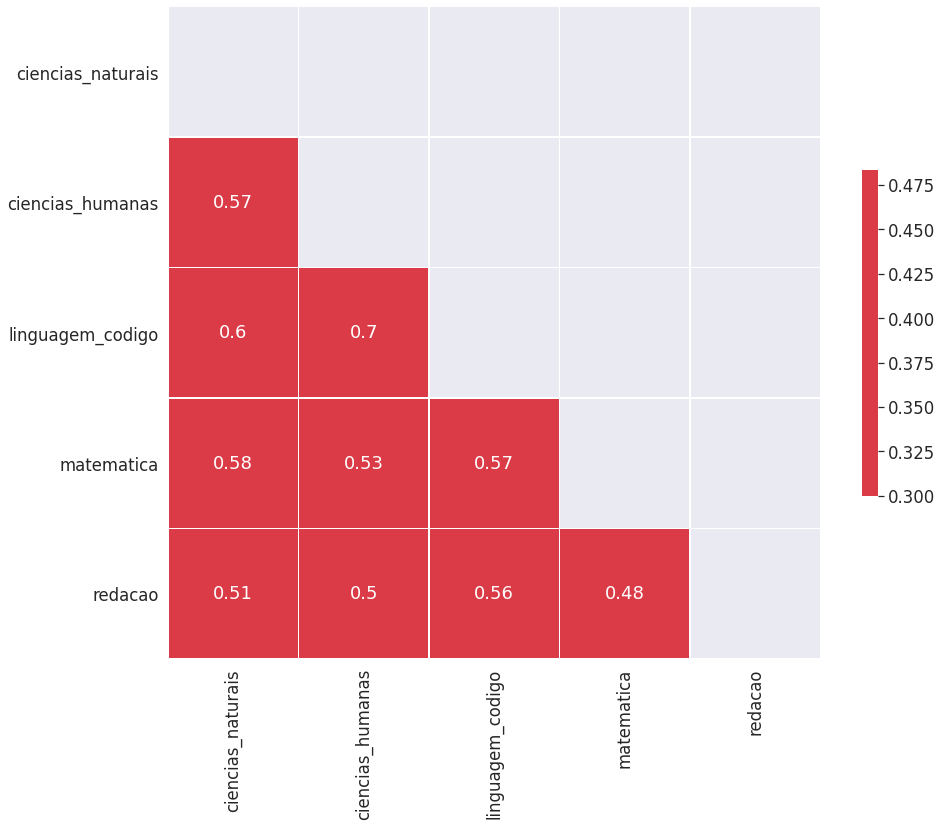

In [5]:
corr = col_notas.corr()
from string import ascii_letters
import numpy as np
sns.set(font_scale=1.5)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

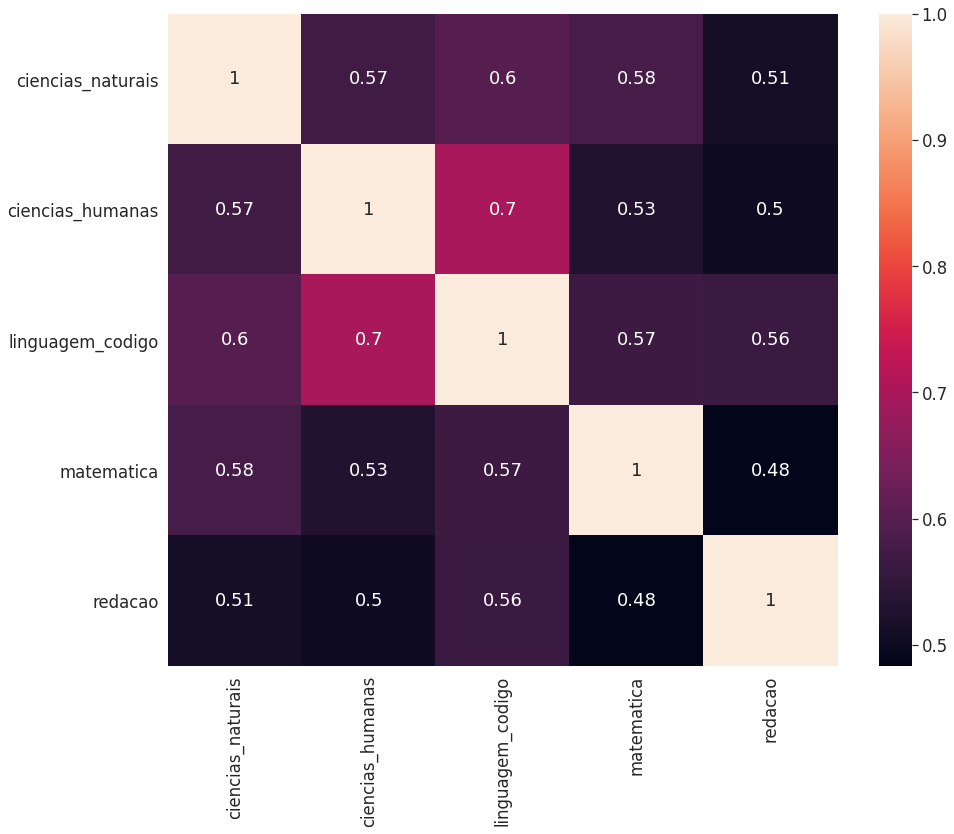

In [6]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True)

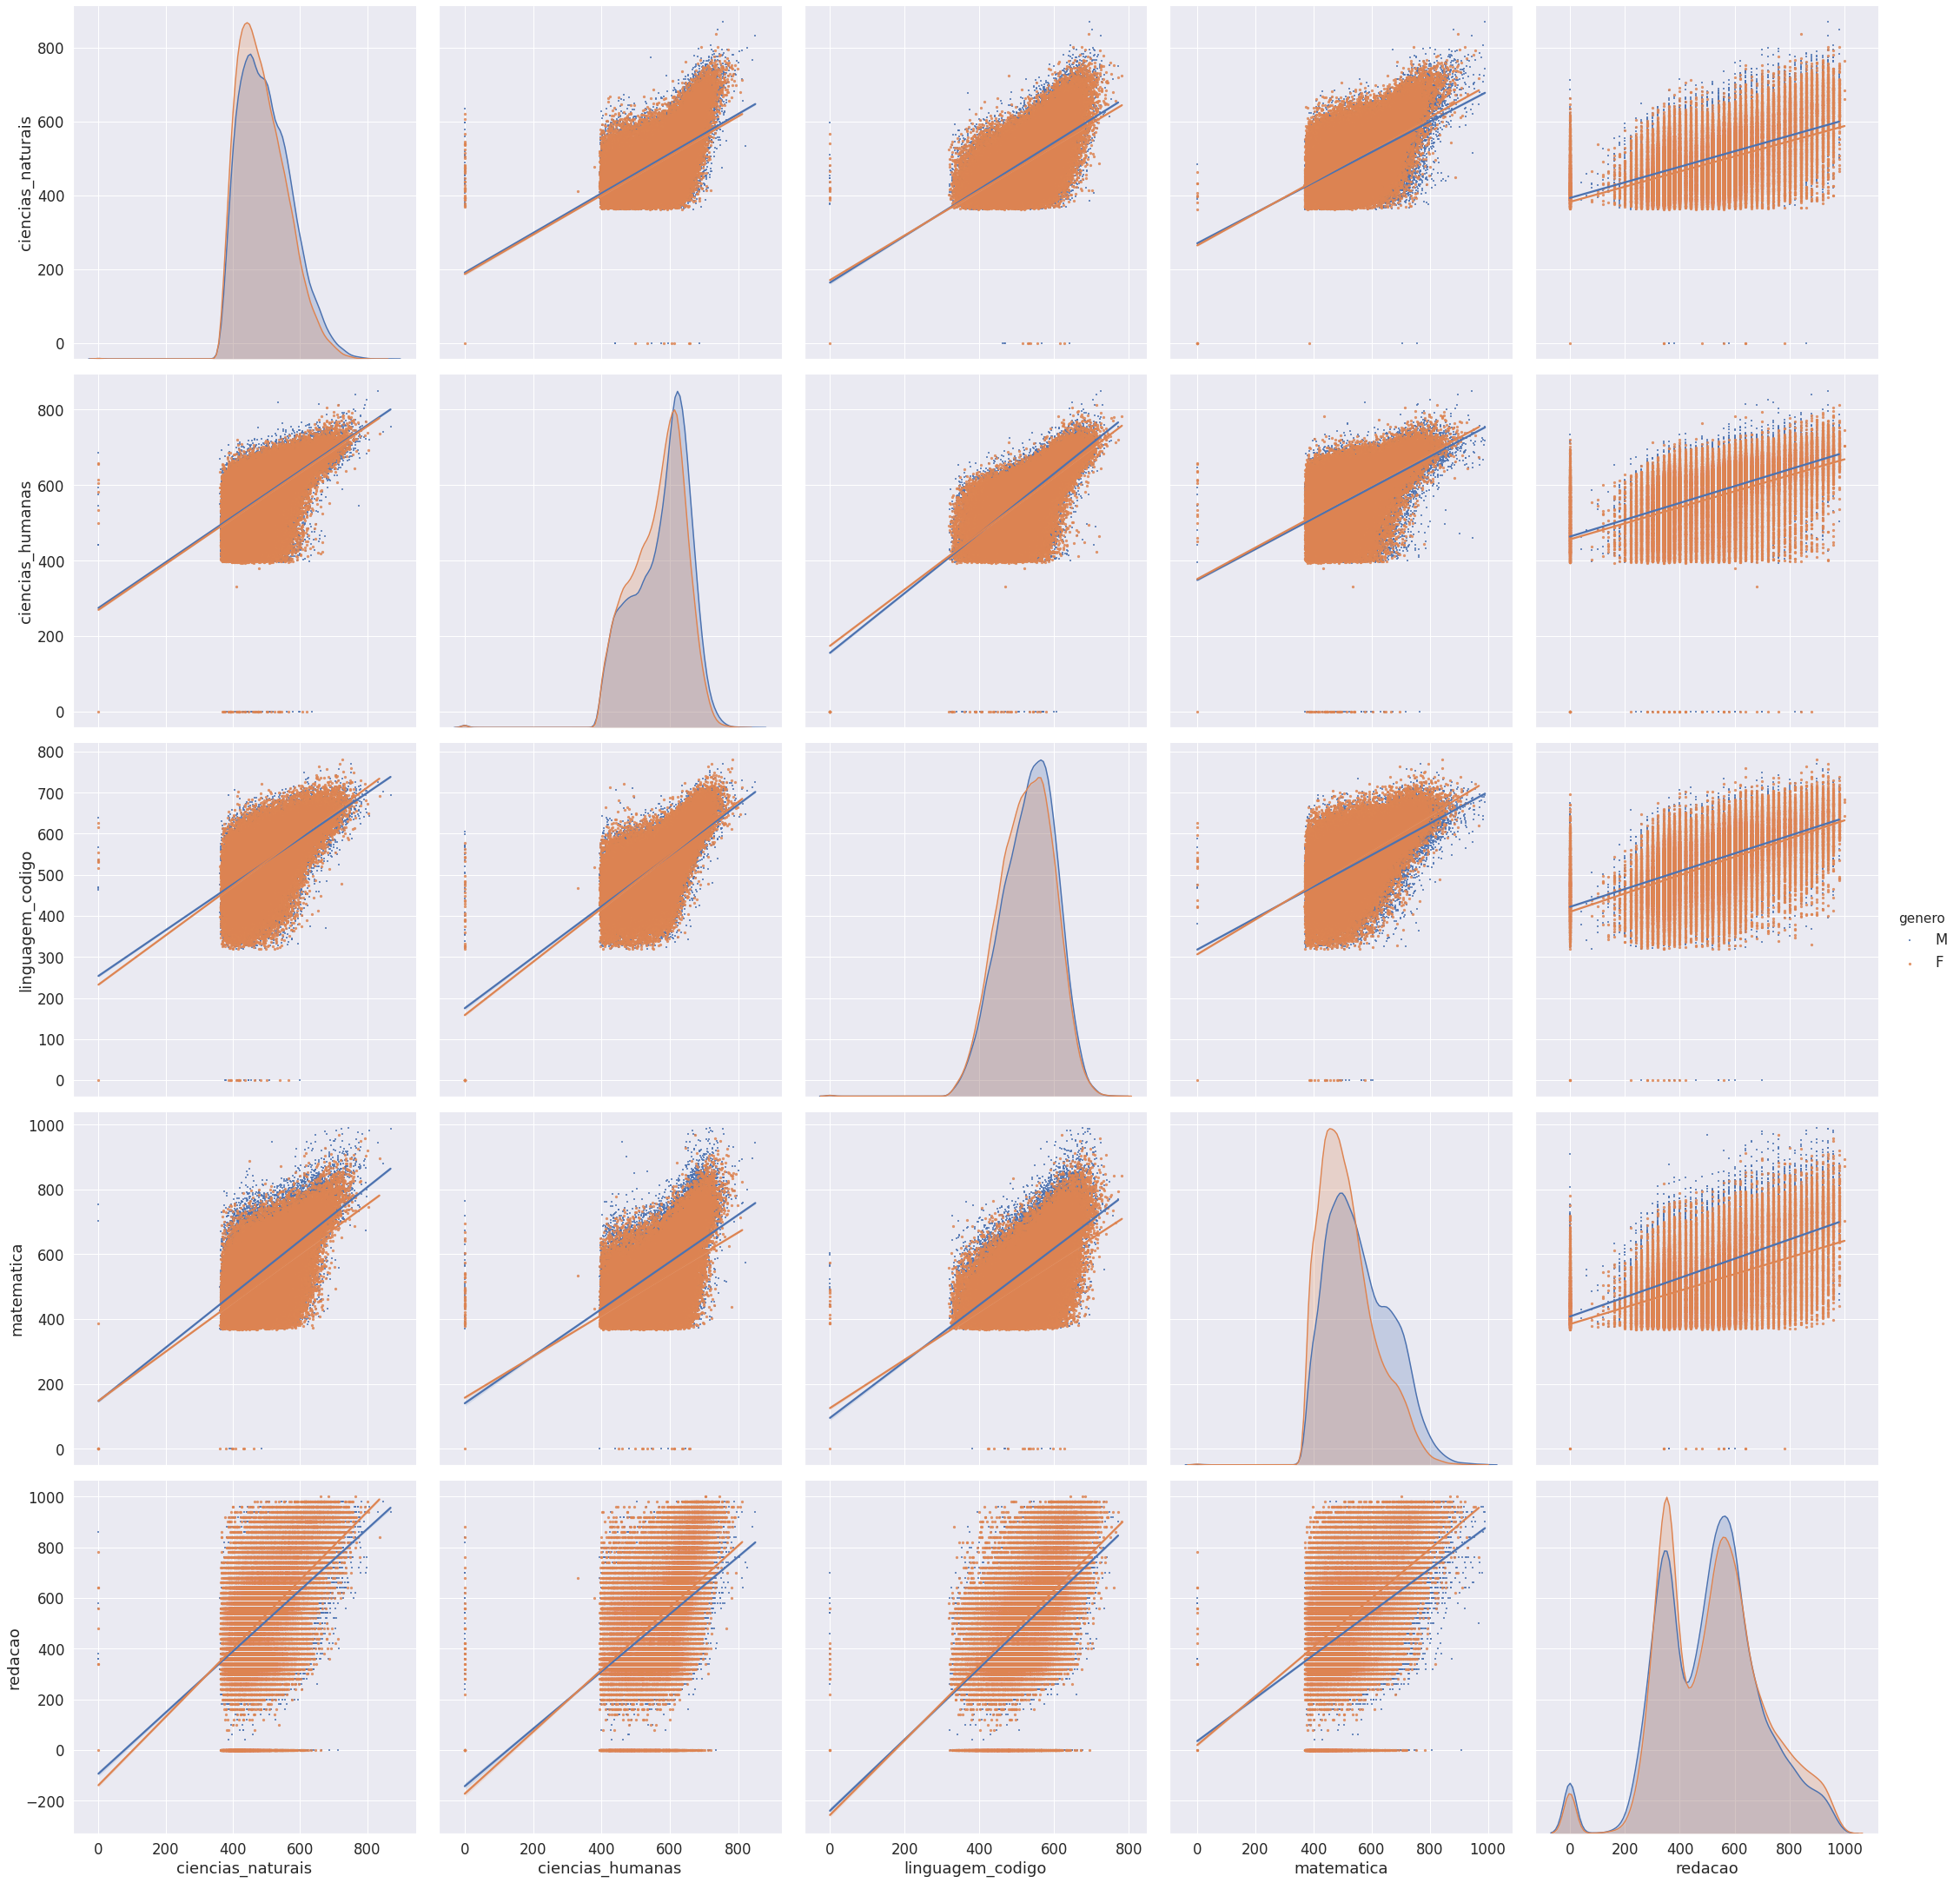

In [7]:
sns.set(font_scale=1.5)
sns.pairplot(col_notas, kind='reg', 
             hue='genero',
             diag_kind='kde',
             height=6, markers=["+", 'o'],
             plot_kws=dict(scatter_kws=dict(s=5)),
             diag_kws=dict(shade=True))
plt.show()

### Desafio 1 da [Thais André](https://twitter.com/thais_tandre)
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [8]:
#@title Substitui os valores nulos das notas de cada matéria de acordo com a presença em cada prova.
df_preparado_enem = df_amostra_enem.copy()
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_CN'].isin([0, 2]), 'NU_NOTA_CN'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_CH'].isin([0, 2]), 'NU_NOTA_CH'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_LC'].isin([0, 2]), 'NU_NOTA_LC'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_PRESENCA_MT'].isin([0, 2]), 'NU_NOTA_MT'] = 0
df_preparado_enem.loc[df_amostra_enem['TP_STATUS_REDACAO'].isna(), 'NU_NOTA_REDACAO'] = 0

df_preparado_enem['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT	NU_NOTA_REDACAO'.split()].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


### Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

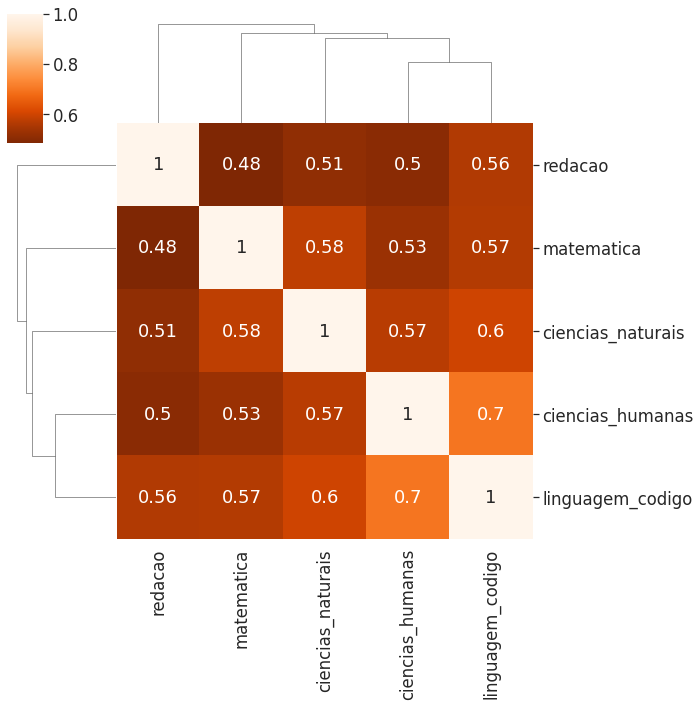

In [9]:
#@title A matriz de correlações abaixo indica as camadas 'hieráquicas' de cada feature. Basicamente a camada mais alta, nesse caso redação, tem forte relação com as camadas abaixo. Pode-se hipotizar que quem se saiu bem na redação, teve um bom desempenho nas demais matérias. Quem teve um bom desempenho em matemática provávelmente teve um bom desempenho nas matérias das camadas inferiores e assim por diante.
sns.clustermap(corr, annot=True, cmap='Oranges_r')

In [0]:
#@title Alguns pré-processamentos dos dados

# Copiei da solução ALURA ;p
def corrigeQuestoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

# Extrai as iniciais das matérias
materias = [iniciais[-2:] for iniciais in raw_col_notas[:4]]

# Cria um dicionário de matérias com os códigos de cada prova
provas_materias = {f'CO_PROVA_{materia}':list(df_amostra_enem.groupby(f'CO_PROVA_{materia}').nunique().index) for materia in list(materias)}

# Cria uma lista de matérias separadas pelo tipo de prova
provas = [str(list(provas_materias.keys())[i])+'_'+str(int(provas_materias[materia][j])) for i, materia in enumerate(list(provas_materias.keys())) for j in range(len(max(provas_materias.items())[1]))]

# Cria um dicionário com os dados de cada estudante separado
series_provas = {prova_materia:df_preparado_enem.query(f'{prova_materia[:-4]}=={prova_materia[-3:]}') for i, prova_materia in enumerate(provas)}

# Cria um dicionário de series com os acertos de cada matéria e tipo de prova
acertos_questoes = {prova:series_provas[prova].apply(corrigeQuestoes, materia=prova[-6:-4], axis=1) for i, prova in enumerate(list(series_provas.keys()))}df_respostas = df_amostra_enem['TX_RESPOSTAS_CN TX_GABARITO_CN TX_RESPOSTAS_CH TX_GABARITO_CH TX_RESPOSTAS_LC TX_GABARITO_LC TX_RESPOSTAS_MT TX_GABARITO_MT'.split()].copy().dropna()

qtd_questoes = {col:len(max(df_respostas[col].values)) for col in list(df_respostas.columns)}

max_qtd_questoes = max(qtd_questoes.values())

df_acertos_questoes_materias = pd.DataFrame(columns=provas, index=list(range(1, max_qtd_questoes+1)), data = 0)
df_erros_questoes_materias = df_acertos_questoes_materias.copy()

for p in list(provas):
  for i in range(len(acertos_questoes[p].columns)):
    df_acertos_questoes_materias.loc[i+1, p] = acertos_questoes[p][i].sum()
    df_erros_questoes_materias.loc[i+1, p] = acertos_questoes[p].groupby(acertos_questoes[p].columns[i]).count().values[0][0]
  acertos_questoes[p] = acertos_questoes[p].merge(df_preparado_enem['NU_NOTA_REDACAO'], left_index=True, right_index=True)

###Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
#@title Ajusta o dataframe para o pairplot
dfs = [acertos_questoes['CO_PROVA_CN_447'],
       acertos_questoes['CO_PROVA_CN_448'],
       acertos_questoes['CO_PROVA_CN_449'],
       acertos_questoes['CO_PROVA_CN_450'],
       acertos_questoes['CO_PROVA_CN_463'],
       acertos_questoes['CO_PROVA_CN_467']]
qtd_acertos_cn = pd.concat(dfs, axis=1, sort=False)

dfs = [acertos_questoes['CO_PROVA_CH_451'],
       acertos_questoes['CO_PROVA_CH_452'],
       acertos_questoes['CO_PROVA_CH_453'],
       acertos_questoes['CO_PROVA_CH_454'],
       acertos_questoes['CO_PROVA_CH_464'],
       acertos_questoes['CO_PROVA_CH_468']]
qtd_acertos_ch = pd.concat(dfs, axis=1, sort=False)

dfs = [acertos_questoes['CO_PROVA_LC_455'],
       acertos_questoes['CO_PROVA_LC_456'],
       acertos_questoes['CO_PROVA_LC_457'],
       acertos_questoes['CO_PROVA_LC_458'],
       acertos_questoes['CO_PROVA_LC_465'],
       acertos_questoes['CO_PROVA_LC_469']]
qtd_acertos_lc = pd.concat(dfs, axis=1, sort=False)

dfs = [acertos_questoes['CO_PROVA_MT_459'],
       acertos_questoes['CO_PROVA_MT_460'],
       acertos_questoes['CO_PROVA_MT_461'],
       acertos_questoes['CO_PROVA_MT_462'],
       acertos_questoes['CO_PROVA_MT_466'],
       acertos_questoes['CO_PROVA_MT_470']]
qtd_acertos_mt = pd.concat(dfs, axis=1, sort=False)
cn = qtd_acertos_cn.sum(axis=1)
ch = qtd_acertos_ch.sum(axis=1)
lc = qtd_acertos_lc.sum(axis=1)
mt = qtd_acertos_mt.sum(axis=1)
rd = pd.Series(df_preparado_enem['NU_NOTA_REDACAO'][df_preparado_enem['NU_NOTA_REDACAO'].values != 0])
df_acertos_materia = pd.DataFrame(columns=['Ciências da Natureza',
                                   'Ciências Humanas',
                                    'Linguagens e Códigos',
                                    'Matemática','Redação'])

df_acertos_materia['Ciências da Natureza'] = cn
df_acertos_materia['Ciências Humanas'] = ch
df_acertos_materia['Linguagens e Códigos'] = lc
df_acertos_materia['Matemática'] = mt
df_acertos_materia['Redação'] = rd
df_acertos_materia['Ciências Humanas'] = df_acertos_materia['Ciências Humanas'].fillna(0)
df_acertos_materia['Linguagens e Códigos'] = df_acertos_materia['Ciências Humanas'].fillna(0)
df_acertos_materia['Redação'] = df_acertos_materia['Ciências Humanas'].fillna(0)

Confirmando o dendograma do heatmap acima, há uma forte relação entre as notas da redação com as demais matérias. A consentração de indivíduos próximos da reta confirmam a correlação entre as features, a baixa variância dos dados e a acertividade da contante calculada.

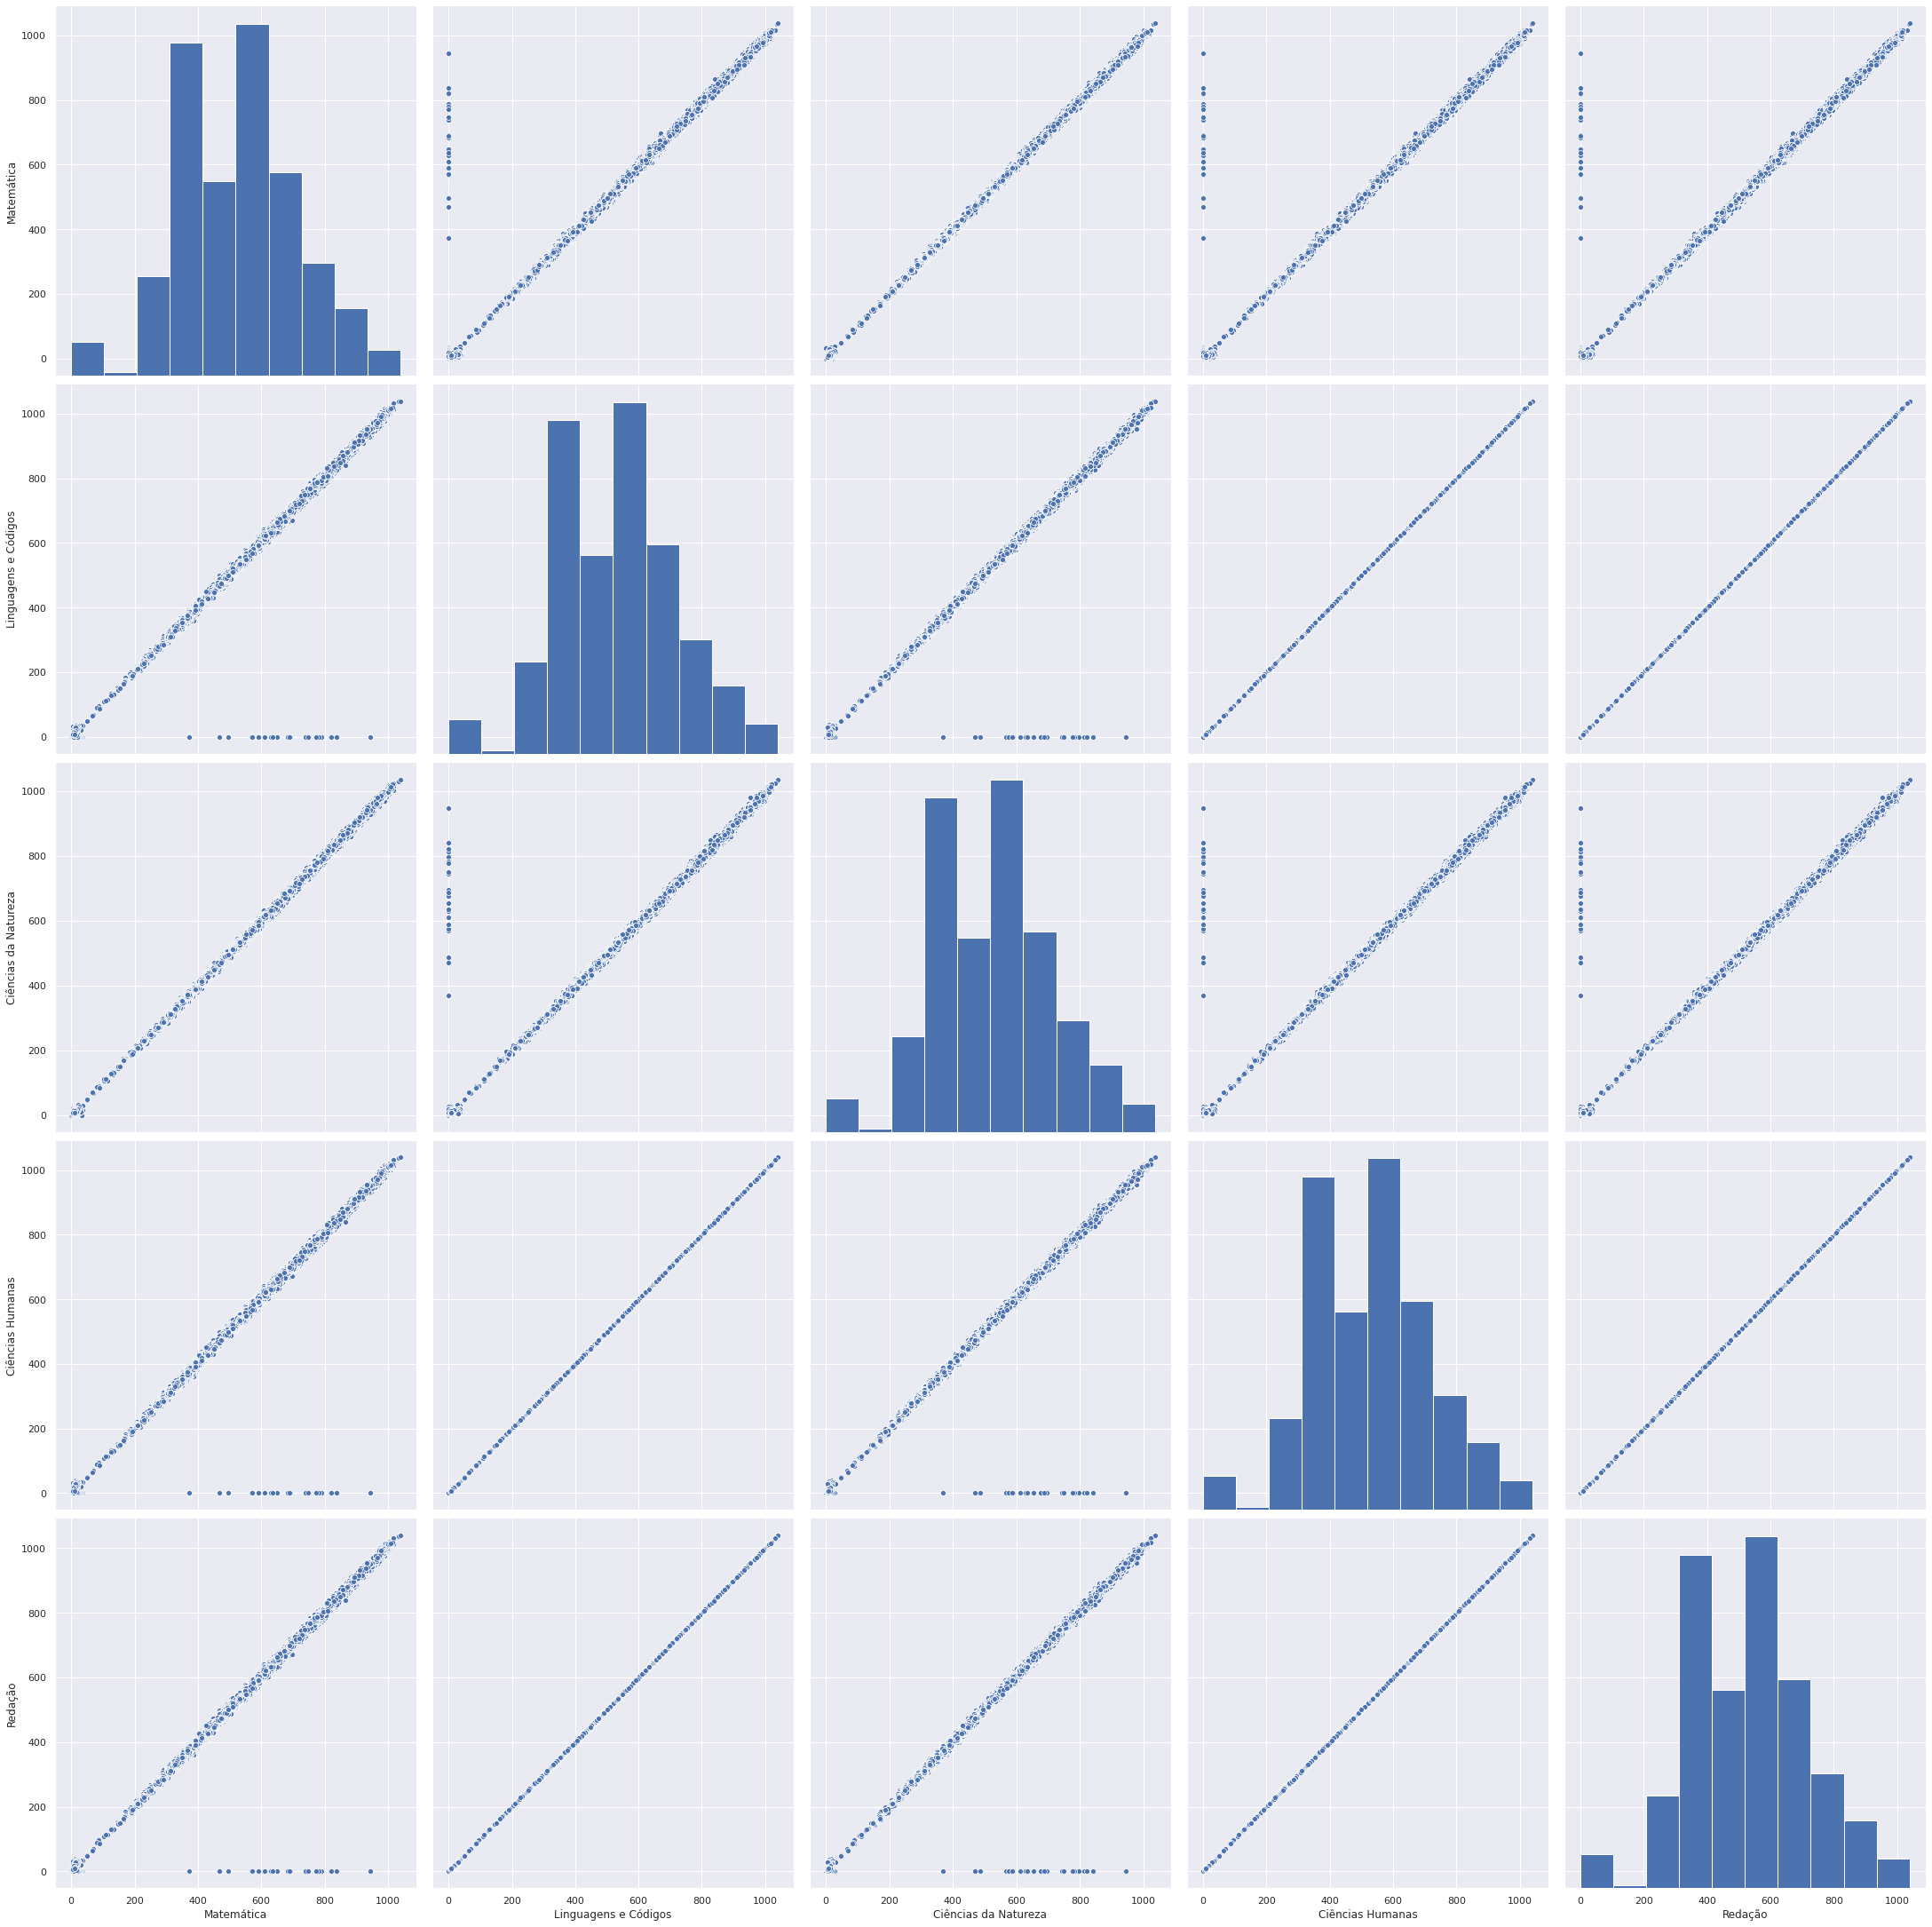

In [65]:
#@title Pairplot de cada matéria
sns.set(font_scale=1)
sns.pairplot(data = df_acertos_materia[['Matemática','Linguagens e Códigos','Ciências da Natureza','Ciências Humanas','Redação']], height=6,)
plt.show()

### Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [93]:
#@title Remove linhas com todas as notas zeradas.
df = df_preparado_enem['NU_NOTA_CN	NU_NOTA_CH	NU_NOTA_LC	NU_NOTA_MT	NU_NOTA_REDACAO'.split()].copy()
df.loc[~df.apply(lambda row: (row==0).all(), axis=1)]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


### Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [19]:
#@title Imprime algumas possíveis anomalias no dataset.
print('Chama a atenção a questão {} da PROVA_MT_459 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_459'][df_acertos_questoes_materias['CO_PROVA_MT_459'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_459'][df_acertos_questoes_materias['CO_PROVA_MT_459'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_459'].max()))
print('Chama a atenção a questão {} da PROVA_MT_460 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_460'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_460'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_460'].max()))
print('Chama a atenção a questão {} da PROVA_MT_462 com {} acertos de {} estudantes.'.format(df_acertos_questoes_materias['CO_PROVA_MT_460'][df_acertos_questoes_materias['CO_PROVA_MT_462'].values == 0].index[0],df_acertos_questoes_materias['CO_PROVA_MT_462'][df_acertos_questoes_materias['CO_PROVA_MT_462'].values == 0].values[0], df_erros_questoes_materias['CO_PROVA_MT_462'].max()))

Chama a atenção a questão 28 da PROVA_MT_459 com 0 acertos de 24452 estudantes.
Chama a atenção a questão 15 da PROVA_MT_460 com 0 acertos de 24333 estudantes.
Chama a atenção a questão 35 da PROVA_MT_462 com 0 acertos de 24387 estudantes.


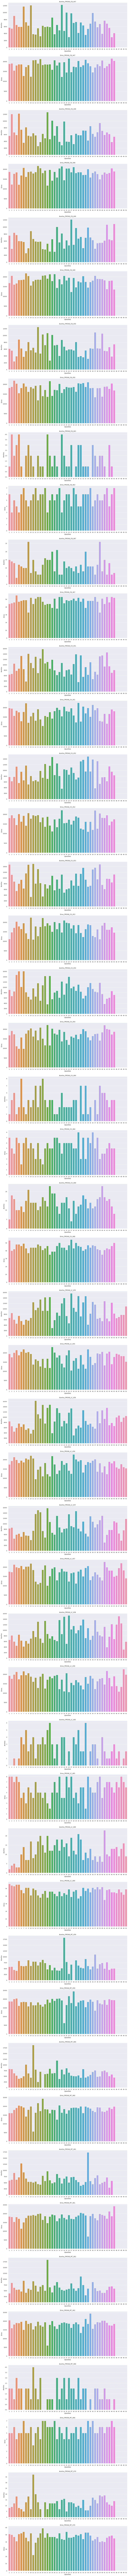

In [20]:
#@title Plota os gráficos de erros e acertos por tipo de prova / matéria.
plt.figure(figsize=(18,200))
sns.set(font_scale=1)
l = 1
for i, col in enumerate(df_acertos_questoes_materias.columns):
  plt.subplot(len(df_acertos_questoes_materias.columns)*2,1,l)
  plt.title(f'Acertos_{col[3:]}')  
  plt.ylabel('Acertos')
  plt.xlabel('Questões')
  sns.barplot(y = df_acertos_questoes_materias[col].values, x=df_acertos_questoes_materias[col].index)

  plt.subplot(len(df_acertos_questoes_materias.columns)*2,1,l+1)
  plt.title(f'Erros_{col[3:]}')
  plt.ylabel('Erros')
  plt.xlabel('Questões')
  sns.barplot(y = df_erros_questoes_materias[col].values, x=df_erros_questoes_materias[col].index)
  l+=2
  
plt.subplots_adjust(bottom=0.5, top=2)
plt.show()

###Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)
Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

O peso da nota da redação e questões mais "difíceis" dificultam a predição pelo fato da relatividade de dificuldade das questões que o Inep mensura, essa avaliação é feita por um sistema chamado Teoria de Resposta ao Item (TRI).
Basicamente pode-se dizer que as questões com mais acertos valem menos, ou seja, quanto menos estudantes acertarem a questão, mais ela vale.